In [67]:
from simulation_functions.KMC_functions import SequenceEnsemble
from fitting_functions.ODE_solving import PetRAFTKineticFitting
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

In [68]:
feed_ratios1 = np.array([
    [17.6, 0., 0.],
    [11.3, 0.48, 0.85],
    [6.8, 1.15, 1.77],
    [7.3, 2.11, 2.58],
    [9.8, 4.16, 6.78],
    [7.0, 2.71, 5.53],
    [19.9, 7.58, 18.48],
])

feed_ratios2 = np.array([
    [30.5, 0., 0.],
    [14.2, 0.61, 0.77],
    [7.8, 2.06, 2.39],
    [6.6, 3.72, 4.16],
    [3.9, 2.36, 4.66],
    [2.9, 1.87, 3.86],
    [3.2, 2.21, 4.72],
])

r_matrix = np.array([
    [1., 1., 1.],
    [1., 1., 1.],
    [1., 1., 1.]
])

Evaluating 'block' number 1
Evaluating 'block' number 2
[ 1.97310918e-13 -3.08780779e-16 -6.41847686e-16]
Evaluating 'block' number 3
[ 1.00499470e-13 -9.74914593e-16 -1.41900380e-15]
Evaluating 'block' number 4
[1.11157611e-13 5.79397641e-16 1.07934495e-14]
Evaluating 'block' number 5
[1.65336494e-13 4.45442294e-14 1.00499470e-13]
Evaluating 'block' number 6
[1.04940362e-13 1.34579847e-14 7.38541173e-14]
Evaluating 'block' number 7
[ 1.00000000e-02  1.17374860e-13 -8.89045781e-14]


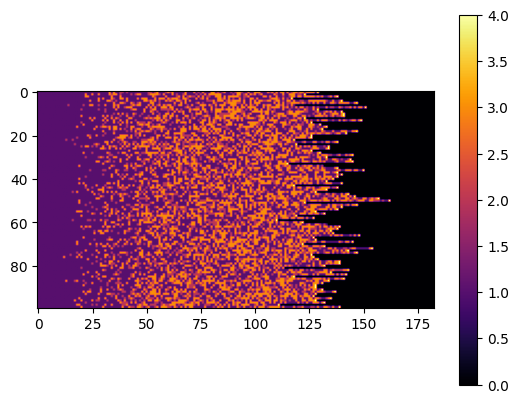

In [69]:
import simulation_functions.KMC_functions
import importlib
importlib.reload(simulation_functions.KMC_functions)
from simulation_functions.KMC_functions import SequenceEnsemble

# feed_ratios = np.array([[27.08, 0.],
#                         [37.41, 7.43],
#                         [26.06, 0.19]])

# r_matrix = np.array([
#     [1., 1.],
#     [1., 1.]
# ])

seq = SequenceEnsemble(100)
all_seqs1 = seq.run_gradient_copolymer(feed_ratios1, 0.05, r_matrix)

# all_seqs = seq.run_block_copolymer(feed_ratios, [0.05, 0.02, 0.02], r_matrix)

# # cmap = plt.get_cmap('viridis',5)
# # bounds = np.linspace(0,3,4)
# # norm = mcolors.BoundaryNorm(bounds, cmap.N)
plt.imshow(all_seqs1, cmap='inferno')
plt.colorbar()
plt.show()

In [70]:
seq = SequenceEnsemble(100)
all_seqs2 = seq.run_gradient_copolymer(feed_ratios2, 0.05, r_matrix)

Evaluating 'block' number 1
Evaluating 'block' number 2
[ 2.57707050e-13 -4.19803081e-16 -5.30825384e-16]
Evaluating 'block' number 3
[ 1.21815752e-13 -3.08780779e-16  6.79664658e-15]
Evaluating 'block' number 4
[9.60585778e-14 3.52183560e-14 4.45442294e-14]
Evaluating 'block' number 5
[3.87710697e-14 5.90846816e-15 5.52023705e-14]
Evaluating 'block' number 6
[ 1.74547876e-14 -1.41900380e-15  3.78828913e-14]
Evaluating 'block' number 7
[2.41161258e-14 2.79984369e-15 5.60905489e-14]


In [77]:
import analysis_functions.sequence_statistics
import importlib
importlib.reload(analysis_functions.sequence_statistics)
from analysis_functions.sequence_statistics import EnsembleSimilarity

e = EnsembleSimilarity(all_seqs1, all_seqs2, 3, [2,3])
e.JS_divergence()

0.10595249623225514

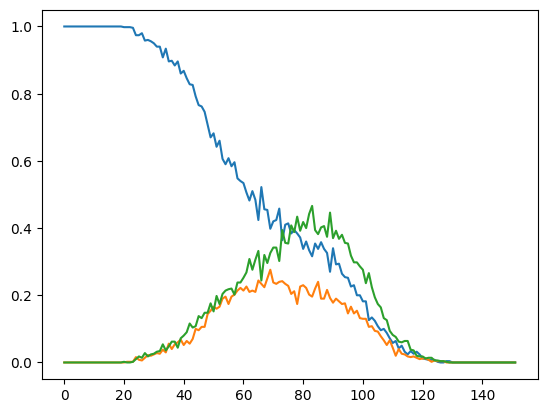

In [12]:
import analysis_functions.sequence_statistics
import importlib
importlib.reload(analysis_functions.sequence_statistics)
from analysis_functions.sequence_statistics import ChainLengthDispersity, MonomerFrequency, ConstructGraph

masses = np.array([87.12, 396.53])

m = MonomerFrequency(all_seqs, 3)
m.plot_frequency()
# m.get_graph()

In [105]:
# peter_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/PDB-4-98_fractions.csv', header=0)
# bridgette_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/B130_MPAM_DMF.csv', header=0)

# plt.scatter(peter_data.iloc[:,0], peter_data.iloc[:,1], label="Bridgette - by hand")
# plt.scatter(bridgette_data.iloc[:,0], bridgette_data.iloc[:,1], label="Peter - online")
# plt.ylim([0,1])
# plt.xlabel("Total conversion")
# plt.ylabel("MPAM conversion")
# plt.legend()
# plt.savefig("comparison.png")

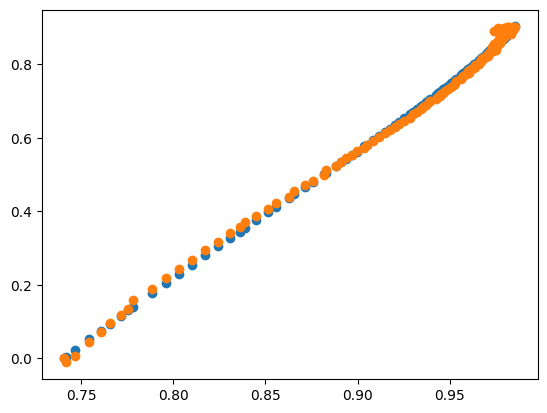

(<Parameter 'r_A', value=0.43873639859531977 +/- 0.00466, bounds=[0:1]>,
 <Parameter 'r_B', value=3.985214462474093 +/- 0.0942, bounds=[1.5:5]>)

In [18]:
import fitting_functions.traditional_methods
import importlib
importlib.reload(fitting_functions.traditional_methods)
from fitting_functions.traditional_methods import MeyerLoweryFitting

# f = PetRAFTKineticFitting(peter_data, 97.95, 34.29) # for Peter
# f = PetRAFTKineticFitting(bridgette_data, 88.1, 31.64) # for Bridgette
# f = PetRAFTKineticFitting(bridgette_data, 70., 30.) 
# f.test_values(1, 50, 50, 1)
# f.display_overlay([1, 2, 1, 10])
# f.extract_rates(0.5, 10)

peter_data = pd.read_excel('/Users/suprajachittari/Documents/peter/sequence/PDB-4-098_conversion.xlsx', header=0)
f = MeyerLoweryFitting()
f.extract_rates(peter_data)

In [ ]:
import fitting_functions.threemonomer
import importlib
importlib.reload(fitting_functions.threemonomer)
from fitting_functions.threemonomer import ThreeMonomerThermalRAFTKineticFitting

exp_data = pd.read_csv('/Users/suprajachittari/Documents/peter/sequence/SC_tba_ba_NIPAM.csv')

p = ThreeMonomerThermalRAFTKineticFitting(exp_data, 69.8, 22.6, 5.7)
p.extract_rates(1,1,1,1,1,1)
# p.display_overlay([1.48, 1.17, 0.832, 1.057, 0.951, 1.036])
# p.display_overlay([1.3854372, 1.1193374, 0.7749093, 1.04711232, 0.95000449, 1.0367488])

# p = ThreeMonomerReducedFitting(exp_data, 69.8, 22.6, 5.7)
# p._fitting()